### Step 1: Install & Import Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Step 2: Load the Dataset

In [2]:
# Load the CSV
df = pd.read_csv("aviation.csv")

# Preview
df.head()


,Date,Airport,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_knots,Visibility_km,Rainfall_mm,Aviation_Tip
0,2022-01-01,Victoria Falls Airport,Windy,33.4,21.7,25.9,7.4,0.6,Perform additional pre-flight checks for contr...
1,2022-01-02,Joshua Mqabuko Nkomo Intl,Thunderstorms,34.1,60.8,13.7,2.7,10.2,Avoid flight paths near storm cells due to tur...
2,2022-01-03,Kariba Airport,Windy,33.2,39.2,44.4,9.8,1.8,High turbulence risk — advise caution for smal...
3,2022-01-04,Victoria Falls Airport,Partly Cloudy,20.6,50.8,29.9,2.7,0.1,Generally good conditions — monitor cloud ceil...
4,2022-01-05,Robert Gabriel Mugabe Intl,Thunderstorms,32.2,61.0,15.4,3.1,16.0,High chance of delays or cancellations — updat...


### Step 3: Encode Categorical Data

In [3]:
# Encode the Aviation Tip (target)
tip_encoder = LabelEncoder()
df['Tip_Label'] = tip_encoder.fit_transform(df['Aviation_Tip'])

# Encode the Weather Condition
df['Weather_Code'] = LabelEncoder().fit_transform(df['Weather_Condition'])


### Step 4: Select Features and Target

In [4]:
features = [
    'Temperature_C',
    'Humidity_%',
    'Wind_Speed_knots',
    'Visibility_km',
    'Rainfall_mm',
    'Weather_Code'
]

X = df[features]
y = df['Tip_Label']


### Step 5: Split the Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 6: Train a Random Forest Model

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 7: Evaluate the Model

Accuracy: 0.37

Classification Report:
                                                                                precision    recall  f1-score   support

                  Advise early morning or evening flights to avoid peak heat.       0.17      0.25      0.20         8
         Avoid flight paths near storm cells due to turbulence and lightning.       0.33      0.38      0.35         8
                                 Check updated METARs before flight planning.       0.25      0.40      0.31         5
         Crosswinds may affect takeoff and landing — review runway alignment.       0.47      0.67      0.55        12
                Delay light aircraft departures due to wet runway conditions.       0.14      0.23      0.18        13
               Density altitude increases — recalculate aircraft performance.       0.50      0.44      0.47         9
                              Expect reduced visibility — consider IFR plans.       0.33      0.25      0.29        16
Favoura

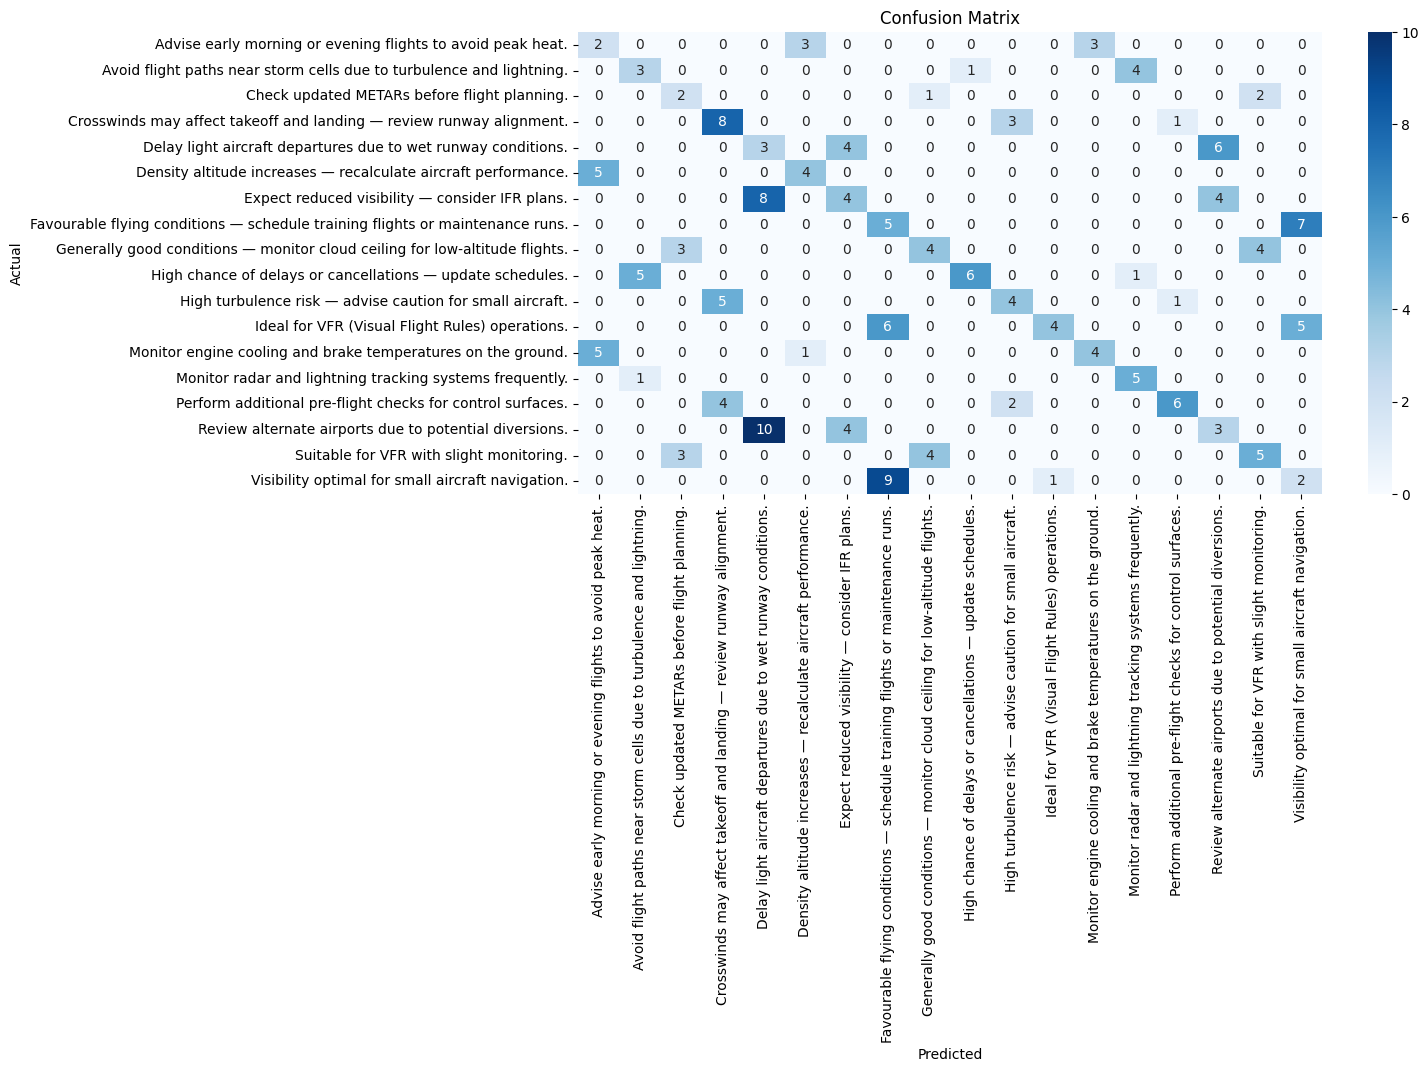

In [7]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=tip_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=tip_encoder.classes_, yticklabels=tip_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Step 8: Predict on New Data

In [8]:
# Example new weather input
sample_input = pd.DataFrame([{
    "Temperature_C": 32,
    "Humidity_%": 60,
    "Wind_Speed_knots": 20,
    "Visibility_km": 6,
    "Rainfall_mm": 5,
    "Weather_Code": LabelEncoder().fit(df["Weather_Condition"]).transform(["Rain"])[0]
}])

# Predict tip
predicted_tip = tip_encoder.inverse_transform(clf.predict(sample_input))[0]
print("Suggested Aviation Tip:", predicted_tip)


Suggested Aviation Tip: Delay light aircraft departures due to wet runway conditions.


### Step 9: Save the Model

In [9]:
import joblib

# Save the trained model and encoders
joblib.dump(clf, "aviation_tip_model.pkl")
joblib.dump(tip_encoder, "tip_encoder.pkl")


['tip_encoder.pkl']

#### Aviation Tip Prediction Script (Using Trained Model)

In [11]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# === Step 1: Load the saved model and encoder ===
clf = joblib.load("aviation_tip_model.pkl")
tip_encoder = joblib.load("tip_encoder.pkl")

# === Step 2: Define the weather input (example) ===
# You can replace these values with live forecast data
input_data = pd.DataFrame([{
    "Temperature_C": 30,
    "Humidity_%": 55,
    "Wind_Speed_knots": 18,
    "Visibility_km": 7,
    "Rainfall_mm": 3,
    "Weather_Code": 2  # e.g. Code for "Rain" if 2 was mapped earlier
}])

# === Step 3: Predict the tip ===
predicted_label = clf.predict(input_data)[0]
predicted_tip = tip_encoder.inverse_transform([predicted_label])[0]

# === Step 4: Output the result ===
print("✅ Recommended Aviation Tip:", predicted_tip)


✅ Recommended Aviation Tip: Delay light aircraft departures due to wet runway conditions.


In [12]:
joblib.dump(clf, "aviation_tip_model.pkl")
joblib.dump(tip_encoder, "tip_encoder.pkl")


['tip_encoder.pkl']